In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('movies_data.csv')
df.head()

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['released_year'] = df['release_date'].dt.year
print(df)

df['profit'] = df['revenue'] - df['budget']
print(df)

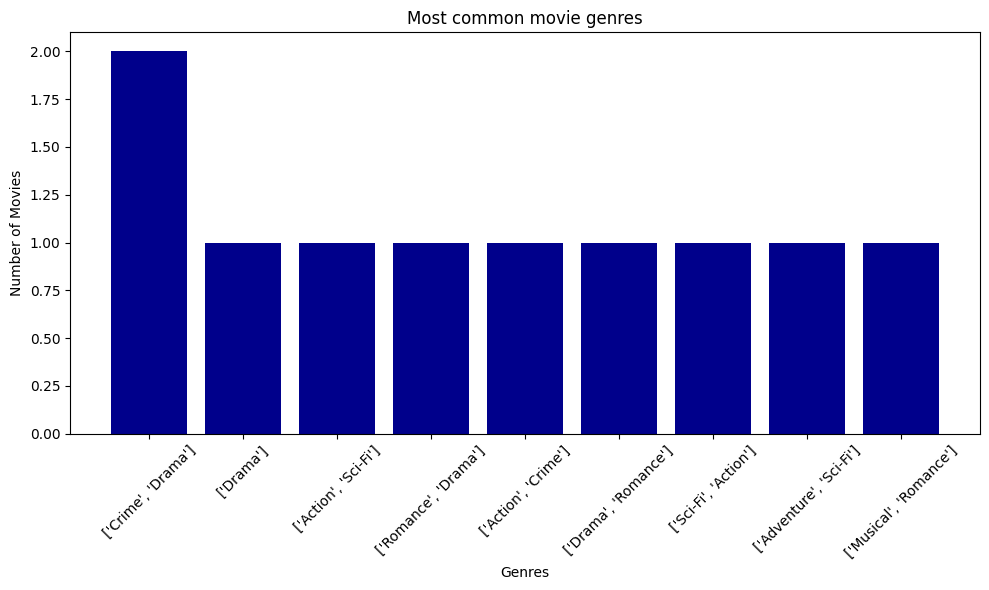

In [3]:
genre_counts = df['genres'].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.to_numpy(), color='darkblue')
plt.title('Most common movie genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

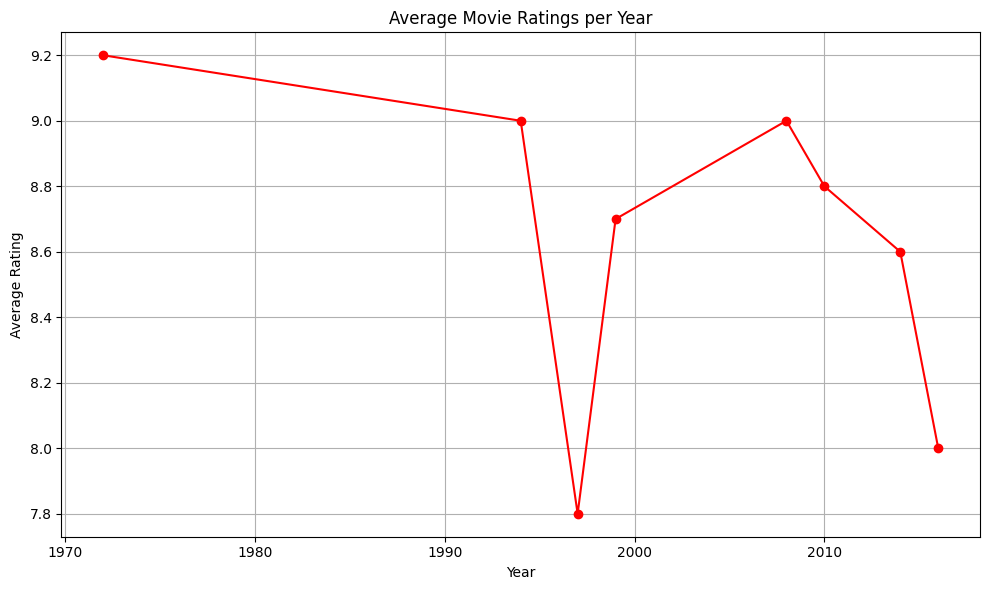

In [4]:
#ratings per year
ratings_per_year = df.groupby('released_year')['vote_average'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ratings_per_year.index, ratings_per_year.values, marker='o', linestyle='-', color='red')
plt.title('Average Movie Ratings per Year')
plt.xlabel('Year')  
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

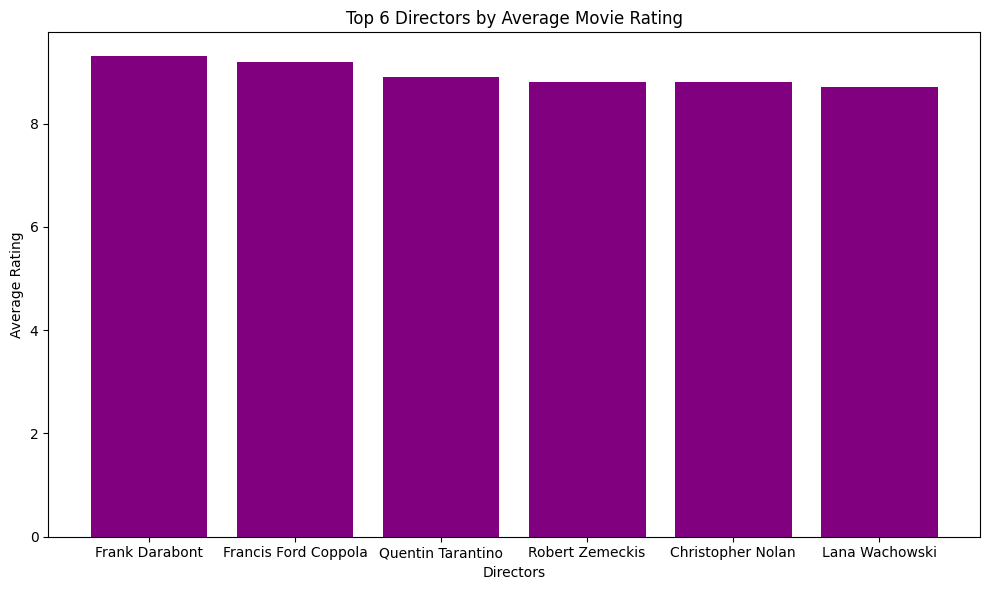

In [5]:
# ratings of directors

director_ratings = df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(6)
plt.figure(figsize=(10, 6))
plt.bar(director_ratings.index, director_ratings.values, color='purple')
plt.title('Top 6 Directors by Average Movie Rating')
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

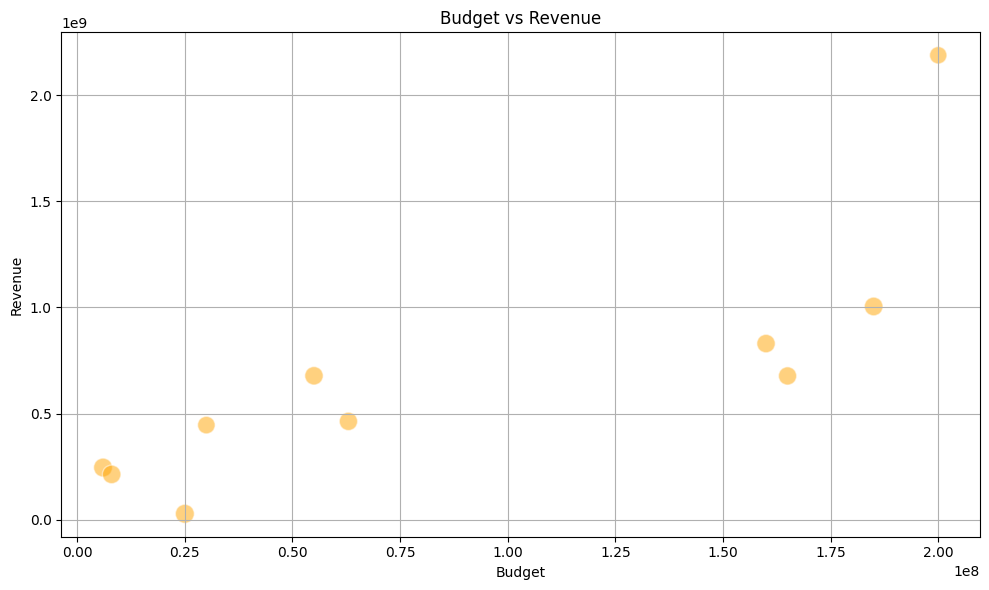

In [6]:
# bubble chart of budget vs revenue
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'],color='orange', 
            s=df['vote_average']*20, alpha=0.5, edgecolors='w')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()
